In [68]:
from spacerocks import SpaceRock
from spacerocks.time import Time
from spacerocks.observing import Observatory
from spacerocks.spice import SpiceKernel
from spacerocks.nbody import Simulation, Force

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

kernel = SpiceKernel()
kernel.load("/Users/kjnapier/data/spice/latest_leapseconds.tls")
kernel.load("/Users/kjnapier/data/spice/de440s.bsp")
kernel.load("/Users/kjnapier/data/spice/sb441-n16s.bsp")

In [69]:
epoch = Time.now()

In [89]:
sim = Simulation.horizons(epoch, "ECLIPJ2000", "ssb")
sim.add_force(Force.solar_gr())
sim.move_to_center_of_mass()

In [90]:
sim.epoch.calendar()

'28 Dec 2024'

In [ ]:
# step one day at a time
distances = []
epochs = []
dt = 1
nyears = 100
for _ in range(1, int(nyears * 365.25 / dt)):
    sim.integrate(sim.epoch + dt)
    earth = sim.get_particle("earth")
    sun = sim.get_particle("sun")
    dx = earth.x - sun.x
    dy = earth.y - sun.y
    dz = earth.z - sun.z
    r = (dx**2 + dy**2 + dz**2)**0.5
    distances.append(r)
    epochs.append(sim.epoch)

In [73]:
# interpolate and find all minima
from scipy.interpolate import interp1d
import numpy as np


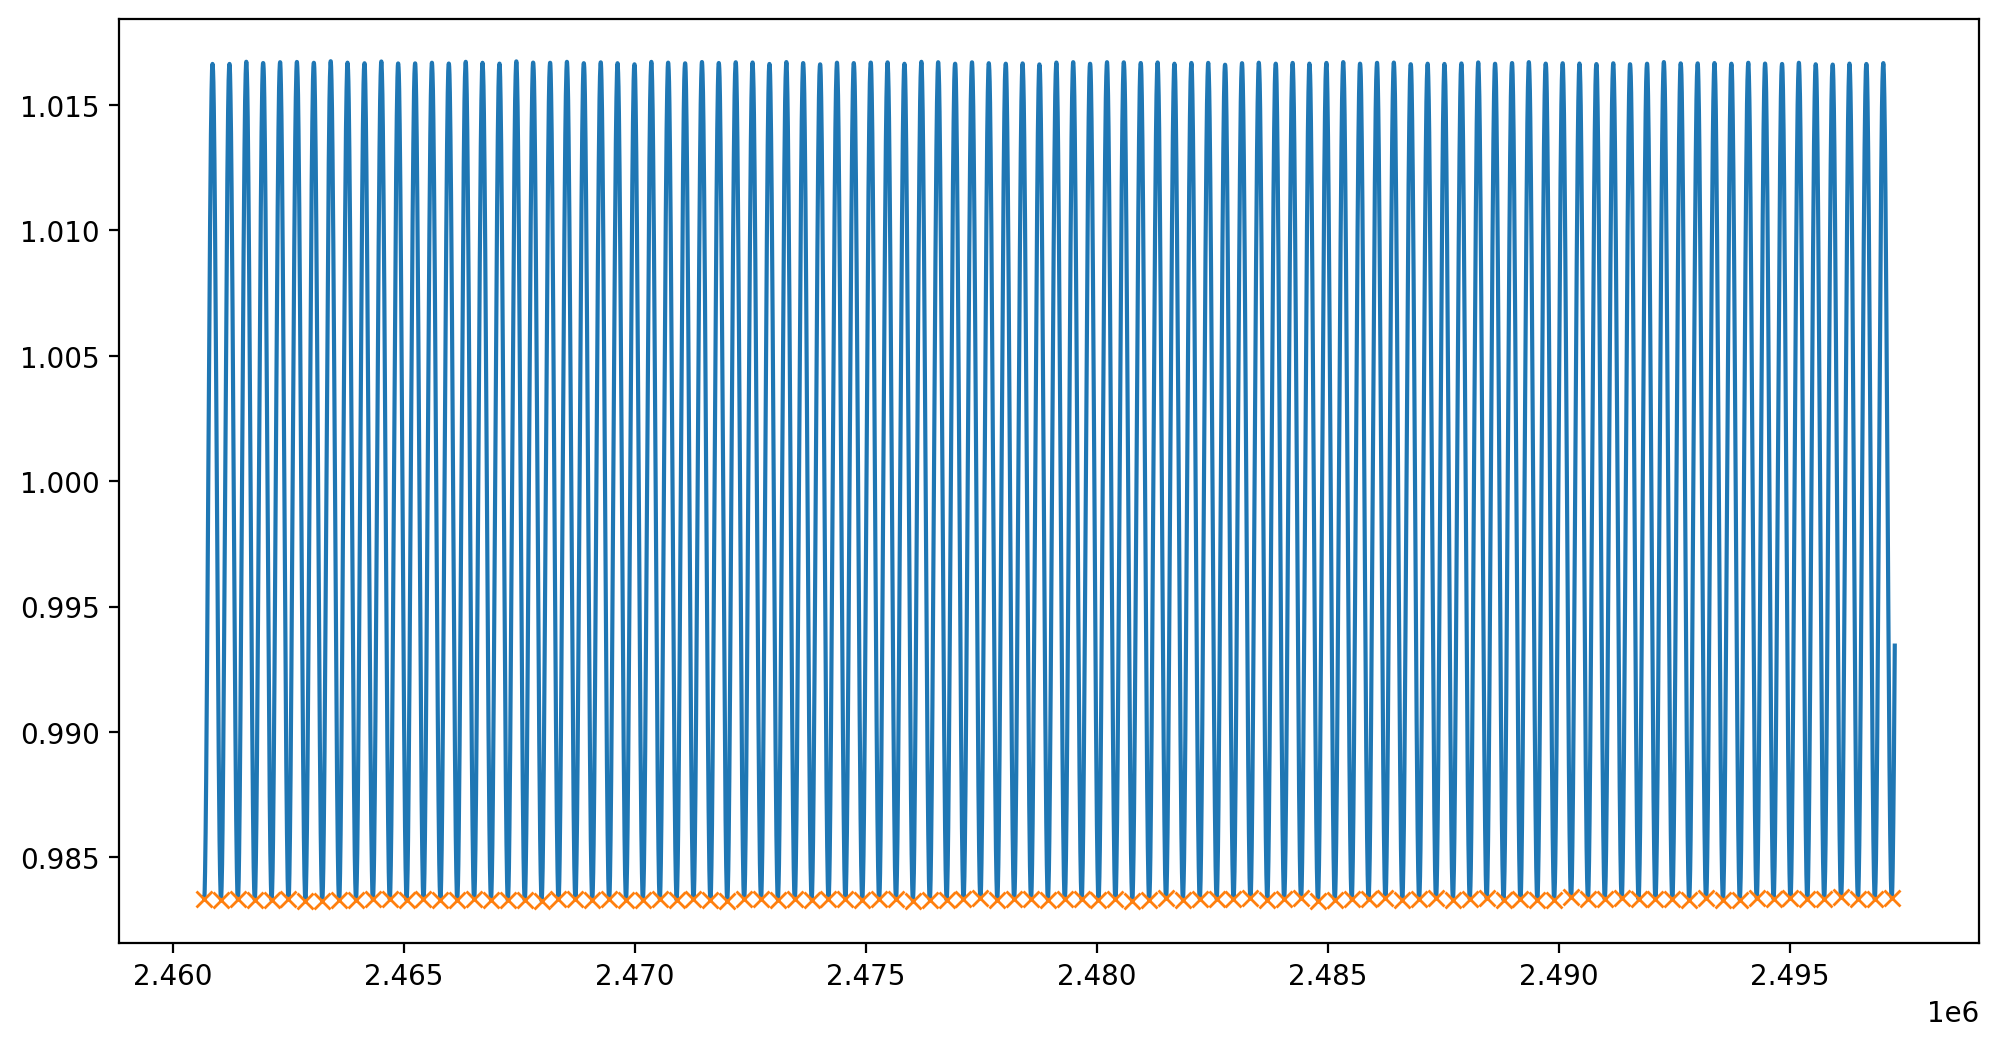

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))

eps = [e.utc().jd() for e in epochs]
ax.plot(eps, distances)

f = interp1d(eps, distances)#, kind='cubic')
xnew = np.linspace(min(eps), max(eps), num=100000, endpoint=True)
ynew = f(xnew)

# find all minima of f
from scipy.signal import find_peaks
peaks, _ = find_peaks(-ynew)
ax.plot(xnew[peaks], ynew[peaks], "x")

In [84]:
solstices = [Time(ep, "utc", "jd") for ep in xnew[peaks]]

In [87]:
for solstice in solstices:
    print(solstice.calendar())

4 Jan 2025
3 Jan 2026
3 Jan 2027
5 Jan 2028
2 Jan 2029
3 Jan 2030
4 Jan 2031
3 Jan 2032
4 Jan 2033
4 Jan 2034
3 Jan 2035
5 Jan 2036
3 Jan 2037
3 Jan 2038
5 Jan 2039
3 Jan 2040
4 Jan 2041
4 Jan 2042
3 Jan 2043
5 Jan 2044
3 Jan 2045
3 Jan 2046
5 Jan 2047
4 Jan 2048
3 Jan 2049
5 Jan 2050
3 Jan 2051
5 Jan 2052
4 Jan 2053
2 Jan 2054
5 Jan 2055
4 Jan 2056
3 Jan 2057
5 Jan 2058
3 Jan 2059
5 Jan 2060
4 Jan 2061
2 Jan 2062
5 Jan 2063
4 Jan 2064
2 Jan 2065
5 Jan 2066
3 Jan 2067
4 Jan 2068
4 Jan 2069
3 Jan 2070
5 Jan 2071
5 Jan 2072
2 Jan 2073
5 Jan 2074
4 Jan 2075
4 Jan 2076
5 Jan 2077
3 Jan 2078
5 Jan 2079
5 Jan 2080
3 Jan 2081
5 Jan 2082
4 Jan 2083
3 Jan 2084
5 Jan 2085
3 Jan 2086
4 Jan 2087
5 Jan 2088
2 Jan 2089
5 Jan 2090
5 Jan 2091
3 Jan 2092
5 Jan 2093
4 Jan 2094
4 Jan 2095
6 Jan 2096
3 Jan 2097
5 Jan 2098
5 Jan 2099
3 Jan 2100
6 Jan 2101
5 Jan 2102
4 Jan 2103
7 Jan 2104
4 Jan 2105
6 Jan 2106
6 Jan 2107
4 Jan 2108
6 Jan 2109
6 Jan 2110
4 Jan 2111
7 Jan 2112
4 Jan 2113
5 Jan 2114
7 Jan 2115

In [88]:
# so it turns out that solstices aren't exactly at perihelion and aphelion